# IMPORT PACKAGES

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# EXPLORATORY DATA ANALYSIS - EDA

In [9]:
file_path = r"C:\Users\suriya\skillupgrade_internship\task_2_titanic\titanic3.xls"
titanic_data = pd.read_excel(file_path)

In [14]:
print(titanic_data.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [15]:
print(titanic_data.head(5))

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [16]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


In [17]:
print(titanic_data.describe())

            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


# DATA PREPROCESSING

In [19]:
titanic_data['age'] = titanic_data['age'].fillna(titanic_data['age'].median())
titanic_data['embarked'] = titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0])
titanic_data['fare']=titanic_data['fare'].fillna(titanic_data['fare'].median())

In [21]:
titanic_data = titanic_data.drop(['cabin', 'name', 'ticket', 'boat', 'body', 'home.dest'], axis=1)

In [22]:
titanic_data = pd.get_dummies(titanic_data, columns=['sex', 'embarked'], drop_first=True)

In [23]:
X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train[['age', 'fare']] = scaler.fit_transform(X_train[['age', 'fare']])
X_test[['age', 'fare']] = scaler.transform(X_test[['age', 'fare']])

# MODEL TRAINING

In [26]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# MODEL EVALUATION

In [27]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [28]:
print(f"\nAccuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.7748091603053435
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       144
           1       0.82      0.64      0.72       118

    accuracy                           0.77       262
   macro avg       0.78      0.76      0.77       262
weighted avg       0.78      0.77      0.77       262

Confusion Matrix:
[[127  17]
 [ 42  76]]


# Calculate the number of survivors

In [30]:

num_survived = titanic_data['survived'].sum()
total_passengers = len(titanic_data)
num_not_survived = total_passengers - num_survived

print(f"Total passengers: {total_passengers}")
print(f"Number of passengers who survived: {num_survived}")
print(f"Number of passengers who did not survive: {num_not_survived}")

Total passengers: 1309
Number of passengers who survived: 500
Number of passengers who did not survive: 809


# VIZUALIZATIONS

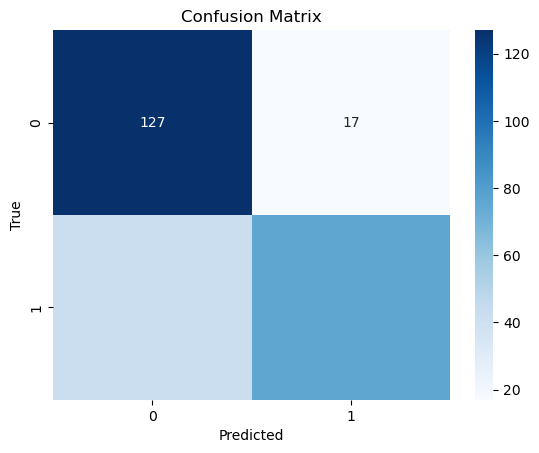

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

C:\Users\suriya\anaconda3\envs\new_env_py3.9\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


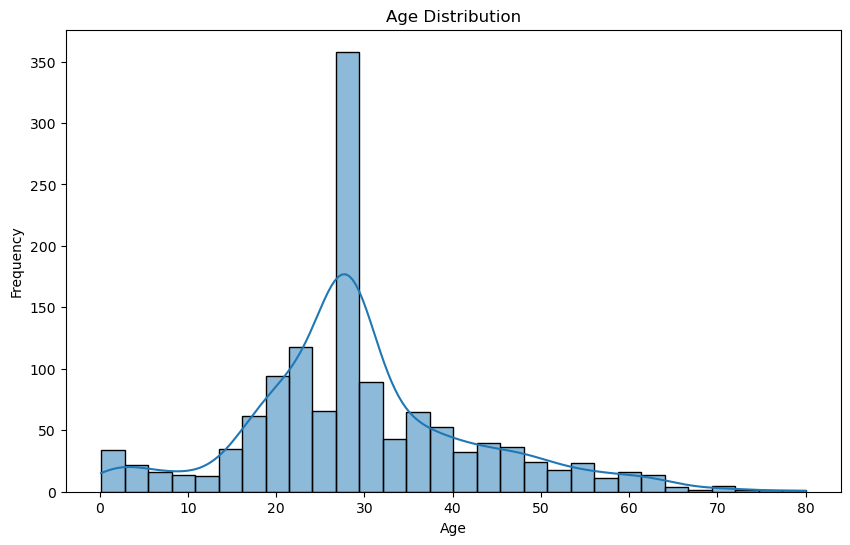

In [38]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

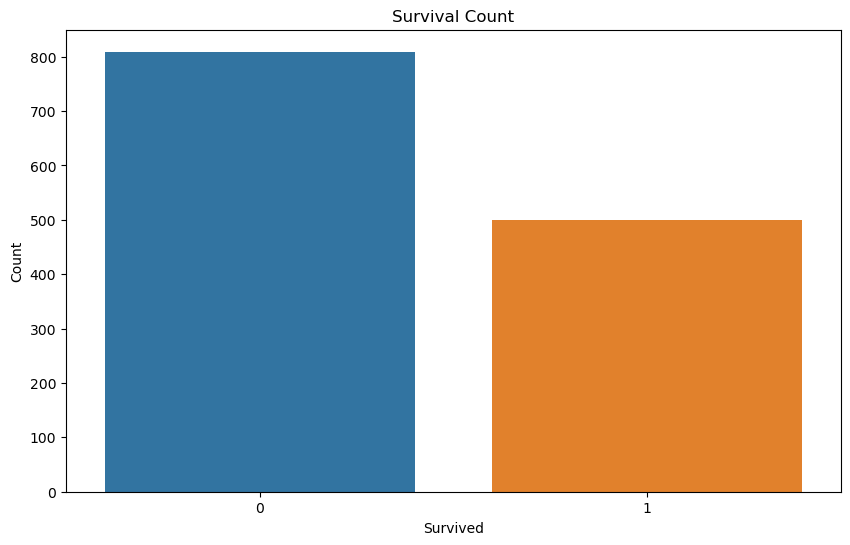

In [39]:
# Survival count
plt.figure(figsize=(10, 6))
sns.countplot(x='survived', data=titanic_data)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

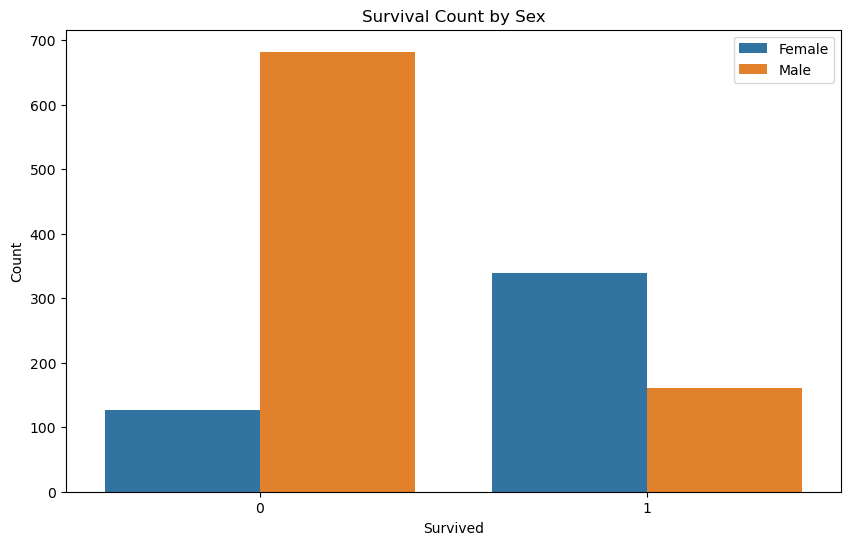

In [40]:
# Survival count by Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='survived', hue='sex_male', data=titanic_data)
plt.title('Survival Count by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.show()

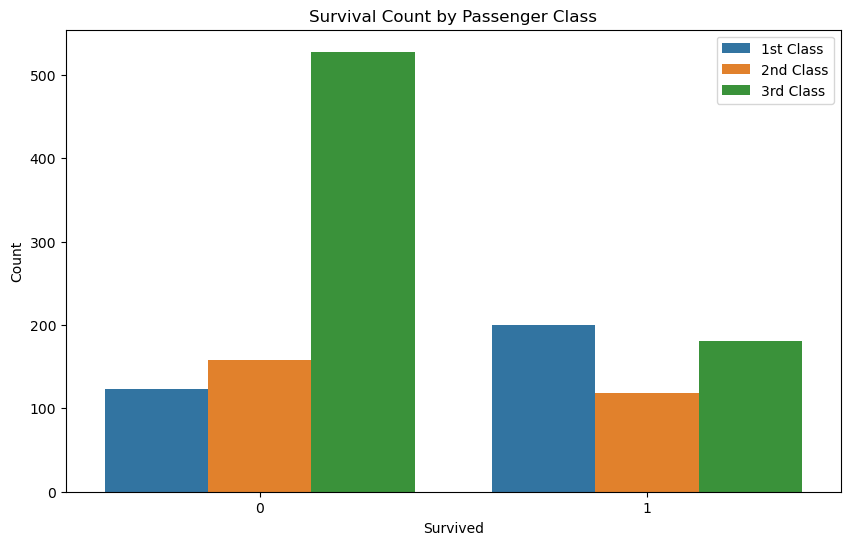

In [35]:
# Survival count by Passenger Class
plt.figure(figsize=(10, 6))
sns.countplot(x='survived', hue='pclass', data=titanic_data)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

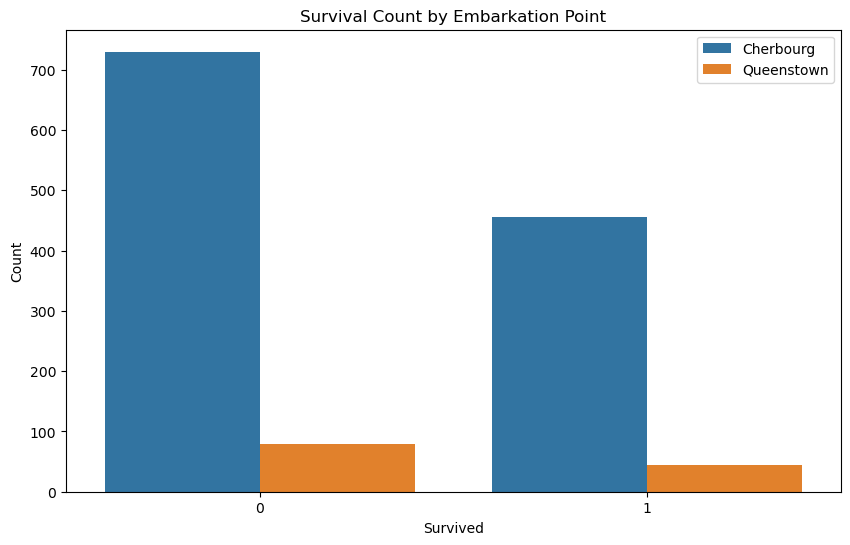

In [41]:
# Survival count by Embarkation point
plt.figure(figsize=(10, 6))
sns.countplot(x='survived', hue='embarked_Q', data=titanic_data)
plt.title('Survival Count by Embarkation Point')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(['Cherbourg', 'Queenstown', 'Southampton'])
plt.show()